In [2]:
import torch
import torchaudio
import matplotlib.pyplot as plt


Shape of waveform: torch.Size([2, 6395904])
Sample rate of waveform: 44100


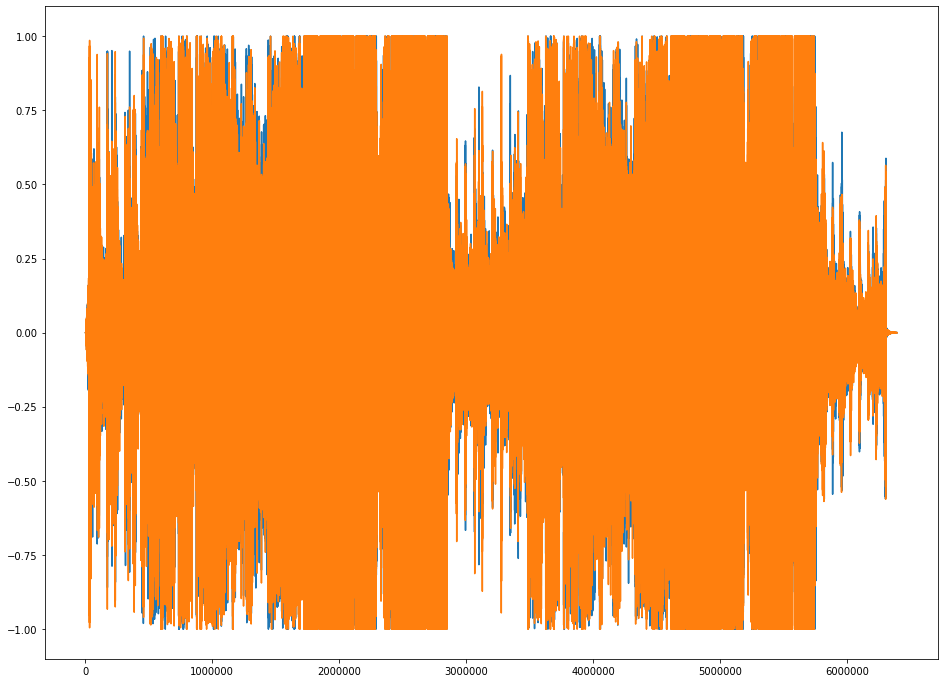

In [10]:
filename = "data/song.mp3"
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure(figsize=(16, 12))
plt.plot(waveform.t().numpy())


Shape of spectrogram: torch.Size([2, 201, 31980])


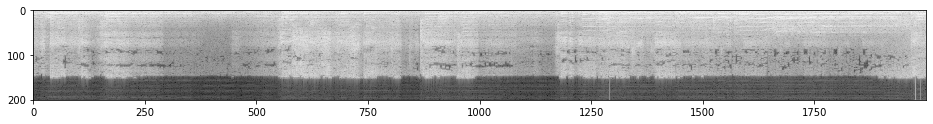

In [20]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {} (channel, freq, time)".format(specgram.size()))

plt.figure(figsize=(16, 12))
plt.imshow(specgram.log2()[0,0:201,1000:3000].numpy(), cmap='gray')

Shape of spectrogram: torch.Size([2, 128, 31980])


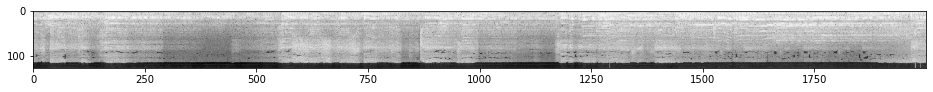

In [23]:
specgram = torchaudio.transforms.MelSpectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure(figsize=(16, 12))
p = plt.imshow(specgram.log2()[0,0:201,1000:3000].detach().numpy(), cmap='gray')

Shape of transformed waveform: torch.Size([1, 639591])


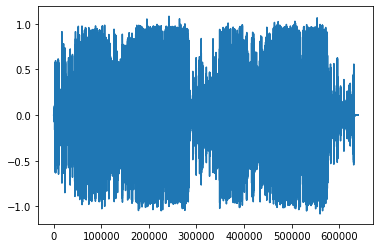

In [24]:
new_sample_rate = sample_rate/10

# Since Resample applies to a single channel, we resample first channel here
channel = 0
transformed = torchaudio.transforms.Resample(sample_rate, new_sample_rate)(waveform[channel,:].view(1,-1))

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

In [25]:
# Let's check if the tensor is in the interval [-1,1]
print("Min of waveform: {}\nMax of waveform: {}\nMean of waveform: {}".format(waveform.min(), waveform.max(), waveform.mean()))

Min of waveform: -1.0
Max of waveform: 1.0
Mean of waveform: 0.0001590390456840396


In [26]:
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

# Let's normalize to the full interval [-1,1]
# waveform = normalize(waveform)

Shape of transformed waveform: torch.Size([2, 6395904])


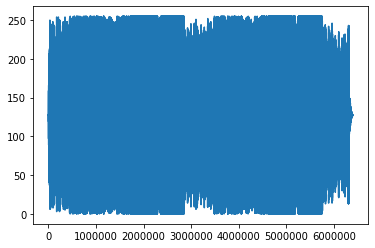

In [27]:
transformed = torchaudio.transforms.MuLawEncoding()(waveform)

print("Shape of transformed waveform: {}".format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

Shape of recovered waveform: torch.Size([2, 6395904])


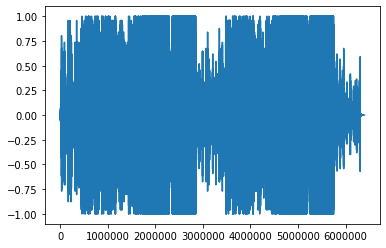

In [28]:
reconstructed = torchaudio.transforms.MuLawDecoding()(transformed)

print("Shape of recovered waveform: {}".format(reconstructed.size()))

plt.figure()
plt.plot(reconstructed[0,:].numpy())

In [29]:
# Compute median relative difference
err = ((waveform-reconstructed).abs() / waveform.abs()).median()

print("Median relative difference between original and MuLaw reconstucted signals: {:.2%}".format(err))

Median relative difference between original and MuLaw reconstucted signals: 1.17%
